# Deep Learning - Regression Example
I demonstrate the use of Deep Learning with Keras. Models with Scikit-learn are created as well for demonstration. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import load_model

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

# Data

In [2]:
data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
data


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA

In [13]:
print('X')
print(np.shape(X))
print(np.shape(X_train))
print(np.shape(X_val))
print('\nY')
print(np.shape(y))
print(np.shape(y_train))
print(np.shape(y_val))

X
(442, 10)
(353, 10)
(89, 10)

Y
(442,)
(353,)
(89,)


In [18]:
X.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object

In [19]:
y.dtypes

dtype('float64')

In [13]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [14]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


# Modelling the data

In [15]:
n_cols = X_train.shape[1]
print(n_cols)
print(X_train.shape)

10
(353, 10)


## Creating two neural networks with Keras

In [22]:
model_1 = Sequential()
# Dense layer means that each node is connected to the nodes in the previous layer
model_1.add(Dense(10, activation = 'relu', input_shape = (n_cols, )))
model_1.add(Dense(10, activation = 'relu'))
model_1.add(Dense(1))

model_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping_monitor = EarlyStopping(patience = 2)
model_1_trained = model_1.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor], verbose = False)

In [23]:
model_2 = Sequential()
model_2.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
model_2.add(keras.layers.Dropout(0.50))
model_2.add(Dense(10, activation = 'relu'))
model_2.add(Dense(10, activation = 'relu'))
model_2.add(Dense(1))

model_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping_monitor = EarlyStopping(patience = 2)
model_2_trained = model_2.fit(X_train, y_train, validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
9/9 [==============================] - 0s 18ms/step - loss: 31524.6953 - val_loss: 22479.6270
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 31508.8867 - val_loss: 22465.4922
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 31489.6172 - val_loss: 22446.0273
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 31461.5820 - val_loss: 22418.2285
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 31423.5312 - val_loss: 22379.1582
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 31371.0430 - val_loss: 22326.0996
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 31290.5098 - val_loss: 22254.4648
Epoch 8/50
9/9 [==============================] - 0s 6ms/step - loss: 31191.8438 - val_loss: 22157.7598
Epoch 9/50
9/9 [==============================] - 0s 7ms/step - loss: 31053.1953 - val_loss: 22030.7891
Epoch 10/50
9/9 [==============================] - 0s 8ms/step 

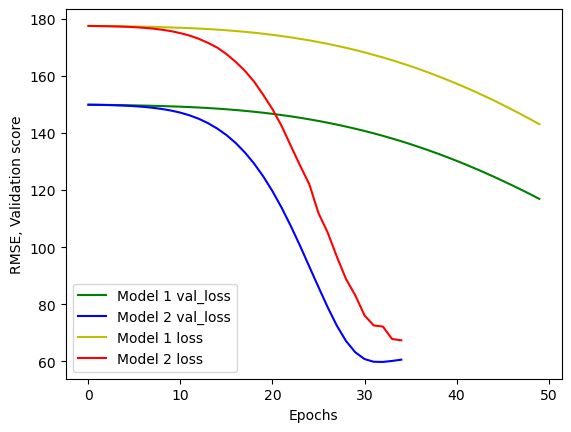

In [26]:
plt.plot(np.sqrt(model_1_trained.history['val_loss']), 'g', label='Model 1 val_loss')
plt.plot(np.sqrt(model_2_trained.history['val_loss']), 'b', label='Model 2 val_loss')
plt.plot(np.sqrt(model_1_trained.history['loss']), 'y', label='Model 1 loss')
plt.plot(np.sqrt(model_2_trained.history['loss']), 'r', label='Model 2 loss')
plt.xlabel('Epochs')
plt.ylabel('RMSE, Validation score')
plt.legend()

## Creating two models with Scikit-learn

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
random_forest = RandomForestRegressor()
param_grid = { 
    'n_estimators': [10, 50, 100],
    'max_depth' : [1, 2, 5, 10],
}
cv_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [29]:
# pd.DataFrame(cv_rf.cv_results_)

# Compare the 4 models on the validation data

In [30]:
y_pred_m1 = model_1.predict(X_val)
y_pred_m2 = model_2.predict(X_val)
y_pred_lin_reg = lin_reg.predict(X_val)
y_pred_rf = cv_rf.predict(X_val)

3/3 [==============================] - 0s 2ms/step


In [31]:
# Caluclate RMSE for each model and see which one is best
print(mean_squared_error(y_pred_m1, y_val))
print(mean_squared_error(y_pred_m2, y_val))
print(mean_squared_error(y_pred_lin_reg, y_val))
print(mean_squared_error(y_pred_rf, y_val))

16615.61875073292
3590.241770645642
2900.173287883231
2851.719932690268


# Demonstration that you can load/save models
Training complex models on large datasets can take alot of time. Fortunately you can save and then load them.

In [32]:
model_2.save('model_file.h5')

In [33]:
my_model = load_model('model_file.h5')

In [34]:
predictions = my_model.predict(X_val)

3/3 [==============================] - 0s 1ms/step


In [35]:
# We get the same result as above
print(mean_squared_error(predictions, y_val))

3590.241770645642
